# <p style="padding:10px;background-color:#000000;margin:0;color:white;font-family:newtimeroman;font-size:135%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Depresso : Student Mental Health Detection</p>

<p style="text-align:justify; ">

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">IMPORTING LIBRARIES</p>

In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import time 

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# string functions
import string


# NLTK
from nltk import word_tokenize, bigrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# ML


# other stuff
from collections import Counter

In [2]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

<a id="2"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">ABOUT DATASET</p>

- This dataset contains information  in excel format which comprises around 6500 data from social media, Facebook comments, posts, etc.
-  All the people selected for data annotation are very well in English Language and are undergraduate students


- There are two columns in this dataset. Text and labels are the two types
- Normal and anxiety/depression text is present in the text columns, and the label column indicates whether the corresponding text denotes anxiety or depression.



In [3]:
df = pd.read_excel('Depression.xlsx')
df.columns

Index(['text', 'label'], dtype='object')

<a id="4"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>


In [4]:
print(f"Shape of The Student  Dataset : {df.shape}")
print(f"\nGlimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})


Shape of The Student  Dataset : (6982, 2)

Glimpse of The Dataset :


,text,label
0,oh my gosh,1.000000
1,"trouble sleeping, confused mind, restless heart. All out of tune",1.000000
2,"All wrong, back off dear, forward doubt. Stay in a restless and restless place",1.000000
3,I've shifted my focus to something else but I'm still worried,1.000000
4,"I'm restless and restless, it's been a month now, boy. What do you mean?",1.000000


In [5]:
df.tail().style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

,text,label
6977,I can't forget you #SpiritHadrian,0.000000
6978,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.DJ DAIKI! DJ DAIKI!!!..#Hey!Say!JUMP.#æœ‰å²¡ ²´,0.000000
6979,Dai5y! <3,0.000000
6980,tired of clowns but still hopefully tonight if not tomorrow ™ but mas tm also no teaser yet.....,0.000000
6981,MW SUBI WN LA VACA,0.000000


In [6]:
print(f"Informations About Dataset :\n")
print(df.info())

Informations About Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6972 non-null   object 
 1   label   6980 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.2+ KB
None


In [7]:
print(f"Summary of The  Dataset :")
df.describe().T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

Summary of The  Dataset :


,count,mean,std,min,25%,50%,75%,max
label,6980.000000,0.105014,0.306594,0.000000,0.000000,0.000000,0.000000,1.000000


In [8]:
df.describe(include=object).T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

,count,unique,top,freq
text,6972,6895,ni-ki best boy,11


In [9]:
print("Null Values of Dataset :")
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

Null Values of Dataset :


,text,label
0,10,2


In [10]:
print("After Dropping, Null Values of  Dataset :")
df.dropna(axis = 0, inplace = True)
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

After Dropping, Null Values of  Dataset :


,text,label
0,0,0


In [11]:
dup_df = df[df.duplicated()].shape[0]
print(f"There are {dup_df} duplicate entries among {df.shape[0]} entries in  dataset.")

There are 77 duplicate entries among 6970 entries in  dataset.


In [12]:
df = df.sample(frac = 1)

<a id="4"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>


In [13]:
df['label'].value_counts().to_frame().T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

,0.000000,1.000000
label,6240,730


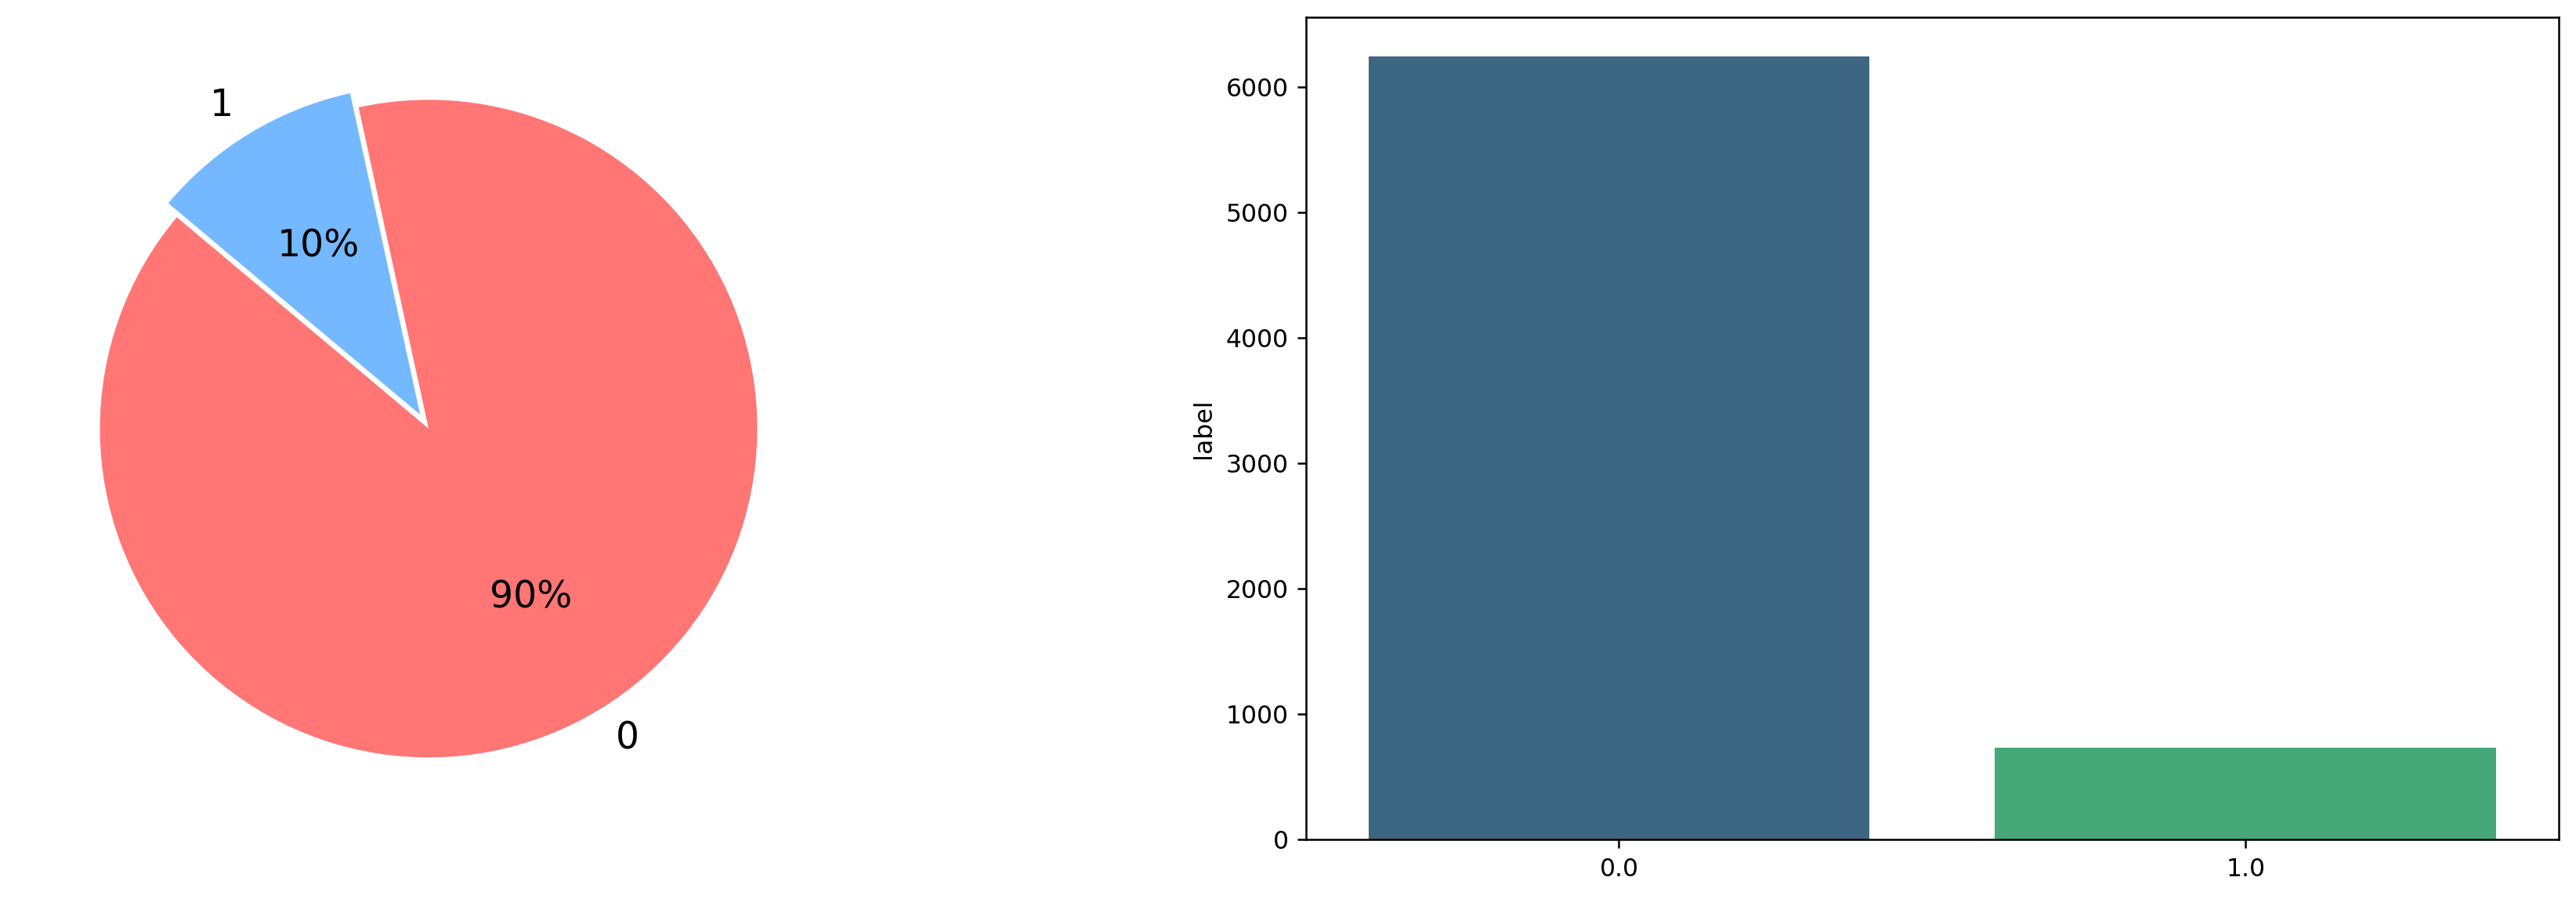

In [14]:
labels = [0,1]
sizes = [6240, 730]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = df['label'].unique(), y = df['label'].value_counts(), palette= 'viridis')

plt.show()

<a id="4"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Preprocessing Text</p>


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import string
from bs4 import BeautifulSoup

In [16]:
pip install spacy

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

 ## Contraction Mapping

In [19]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [20]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    return newString

In [21]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [22]:
print(df)

                                                   text  label
6094  Bored, do you want to rest, can you block ever...    0.0
4344                                        very hiccup    0.0
3701                                             I hope    0.0
751                           I feel like slapping mama    0.0
5593  FWB! F Bekasi-Setu who doesn't go anywhere on ...    0.0
...                                                 ...    ...
3549                  Even though I'm just accompanying    0.0
5094                            nana once tweeted boobs    0.0
3879  Social media is very dangerous for your mental...    0.0
3139  Arrange for open orders for zepeto needs, thos...    0.0
4399                        hey there's another meeting    0.0

[6970 rows x 2 columns]


In [23]:
df['cleaned'] = df["text"].apply(text_cleaner)

C:\Users\shish\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [24]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


<a id="4"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Visualizing WordCloud</p>


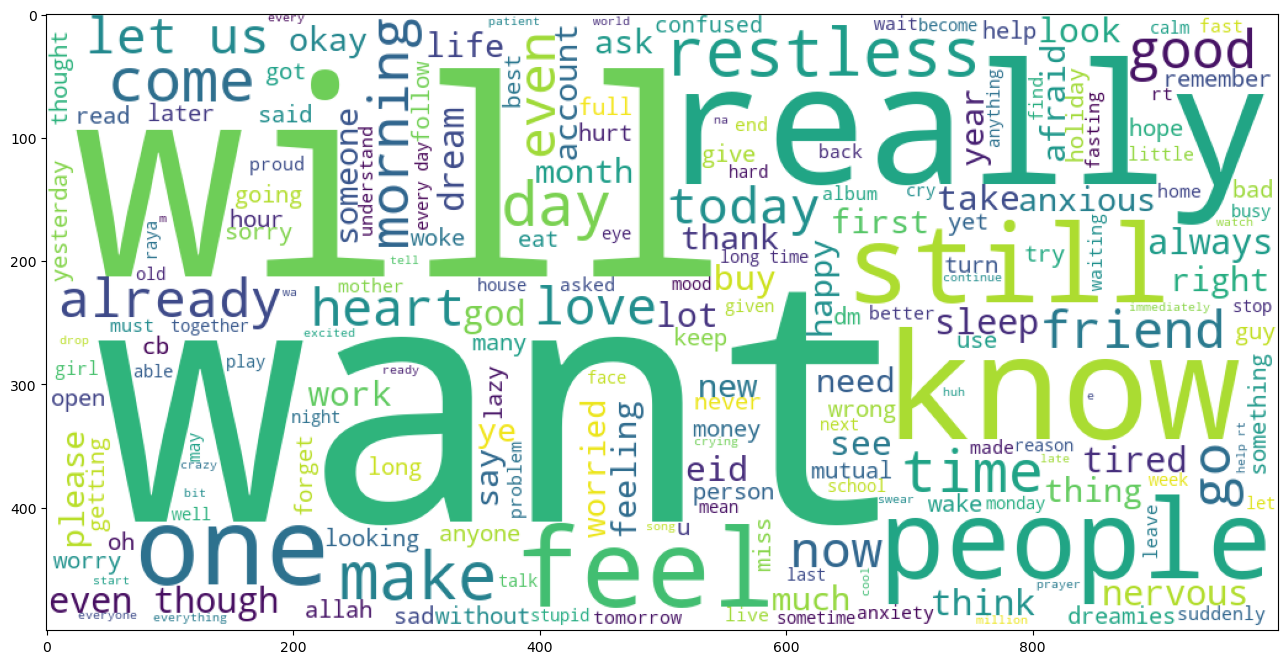

In [25]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [26]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [27]:
df.tail().style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

,text,label,cleaned
3549,Even though I'm just accompanying,0.000000,even though i am just accompanying
5094,nana once tweeted boobs,0.000000,nana once tweeted boobs
3879,Social media is very dangerous for your mental health.,0.000000,social media is very dangerous for your mental health
3139,"Arrange for open orders for zepeto needs, those who want direct dm or wa only °",0.000000,arrange for open orders for zepeto needs those who want direct dm or wa only
4399,hey there's another meeting,0.000000,hey there is another meeting


<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">MACHINE LEARNING MODEL</p>

## Feature Extraction with CountVectorizer

In [28]:
X = df.cleaned
y = df.label

In [29]:
vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))

In [30]:
X_cv =vect.fit_transform(X).toarray()

In [31]:
X_cv.shape

(6970, 20000)

In [32]:
df.cleaned

6094    bored  do you want to rest  can you block ever...
4344                                          very hiccup
3701                                               i hope
751                             i feel like slapping mama
5593    fwb  f bekasi setu who does not go anywhere on...
                              ...                        
3549                   even though i am just accompanying
5094                              nana once tweeted boobs
3879    social media is very dangerous for your mental...
3139    arrange for open orders for zepeto needs  thos...
4399                         hey there is another meeting
Name: cleaned, Length: 6970, dtype: object

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 1,stratify = y)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [35]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Logistic Regression</p>

Accuracy : 0.9813486370157819

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1248
         1.0       0.98      0.84      0.90       146

    accuracy                           0.98      1394
   macro avg       0.98      0.92      0.95      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


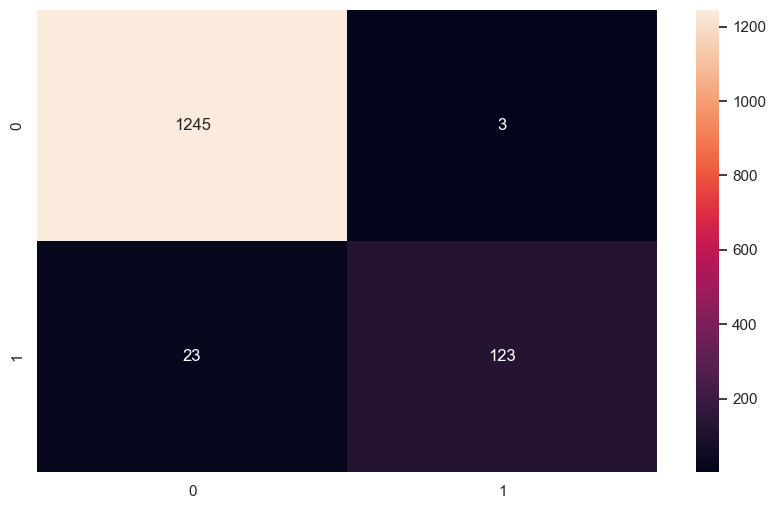

In [36]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
performance_eval(clf_lr,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Naive Bayes</p>

Accuracy : 0.9354375896700143

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1248
         1.0       0.64      0.88      0.74       146

    accuracy                           0.94      1394
   macro avg       0.81      0.91      0.85      1394
weighted avg       0.95      0.94      0.94      1394

   ------------ Confusion Matrix -------------- 


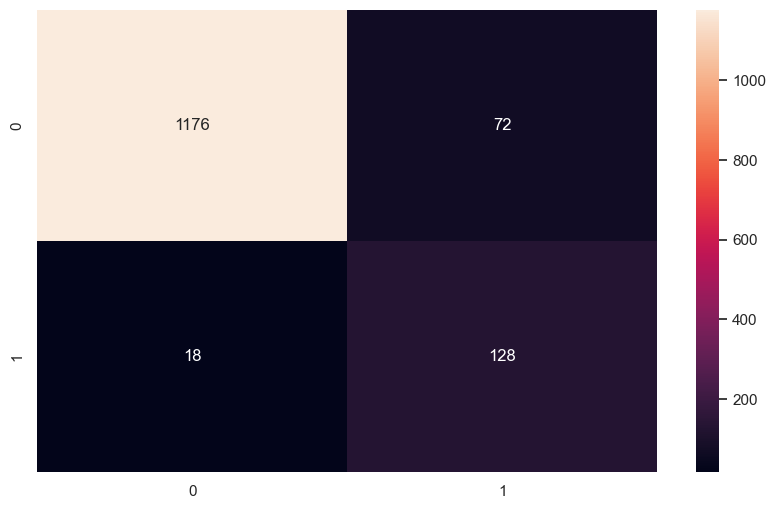

In [37]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
performance_eval(clf_nb,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Decision Tree</p>

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
performance_eval(clf_dt,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Support Vector Machine</p>

Accuracy : 0.9612625538020086

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1248
         1.0       0.98      0.64      0.78       146

    accuracy                           0.96      1394
   macro avg       0.97      0.82      0.88      1394
weighted avg       0.96      0.96      0.96      1394

   ------------ Confusion Matrix -------------- 


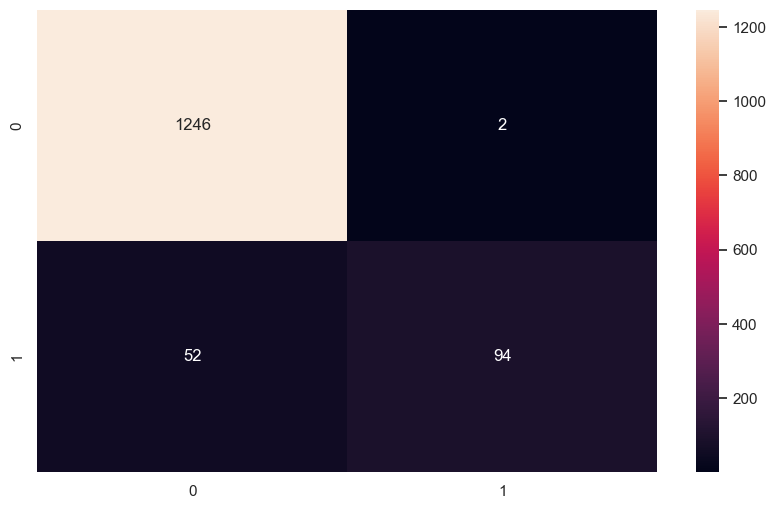

In [39]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
performance_eval(clf_svm,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">AdaBoost </p>

Accuracy : 0.9913916786226685

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1248
         1.0       0.95      0.97      0.96       146

    accuracy                           0.99      1394
   macro avg       0.97      0.98      0.98      1394
weighted avg       0.99      0.99      0.99      1394

   ------------ Confusion Matrix -------------- 


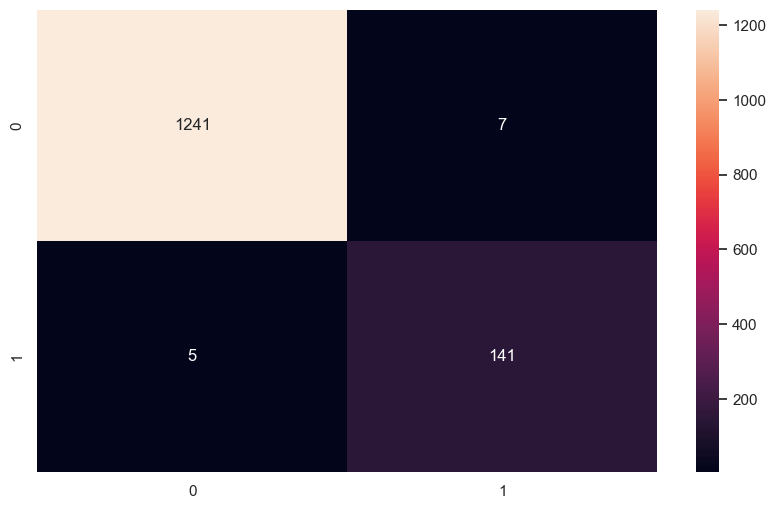

In [40]:
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train, y_train)
performance_eval(clf_adb,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">KNN</p>

C:\Users\shish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy : 0.9160688665710186

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1248
         1.0       0.94      0.21      0.35       146

    accuracy                           0.92      1394
   macro avg       0.93      0.61      0.65      1394
weighted avg       0.92      0.92      0.89      1394

   ------------ Confusion Matrix -------------- 


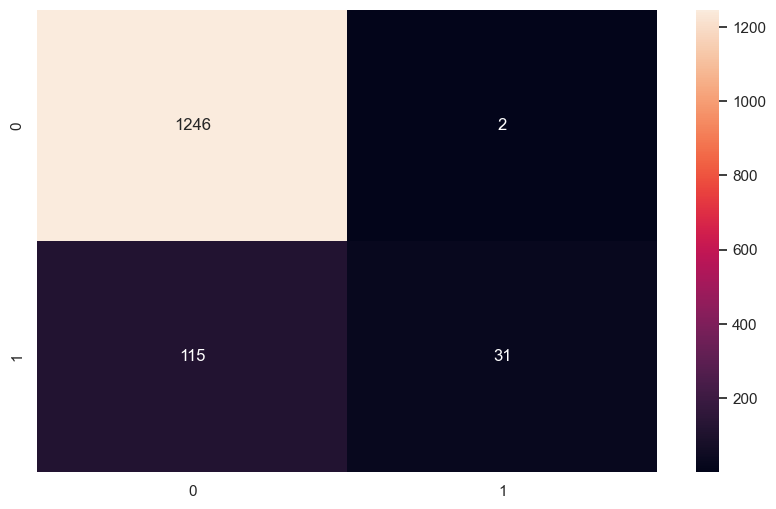

In [41]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
performance_eval(clf_knn,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Random Forest</p>

Accuracy : 0.9842180774748924

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1248
         1.0       0.97      0.88      0.92       146

    accuracy                           0.98      1394
   macro avg       0.98      0.94      0.96      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


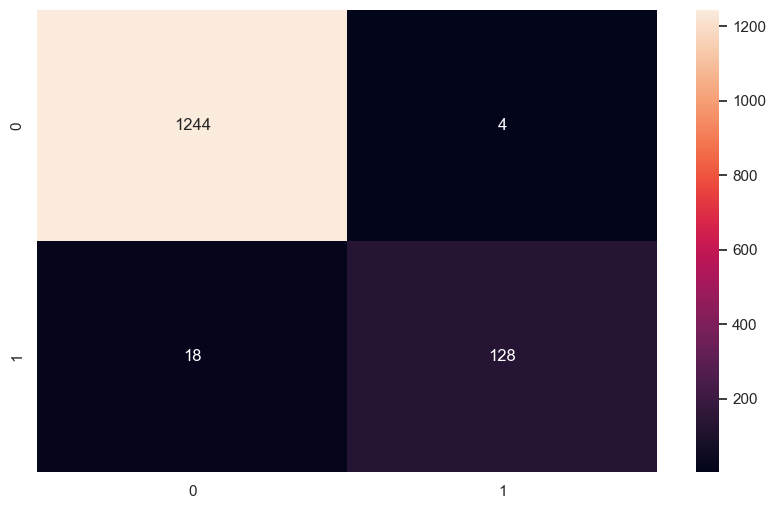

In [42]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
performance_eval(clf_rf,X_test)

C:\Users\shish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy : 0.9899569583931134

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1248
         1.0       0.99      0.92      0.95       146

    accuracy                           0.99      1394
   macro avg       0.99      0.96      0.97      1394
weighted avg       0.99      0.99      0.99      1394

   ------------ Confusion Matrix -------------- 


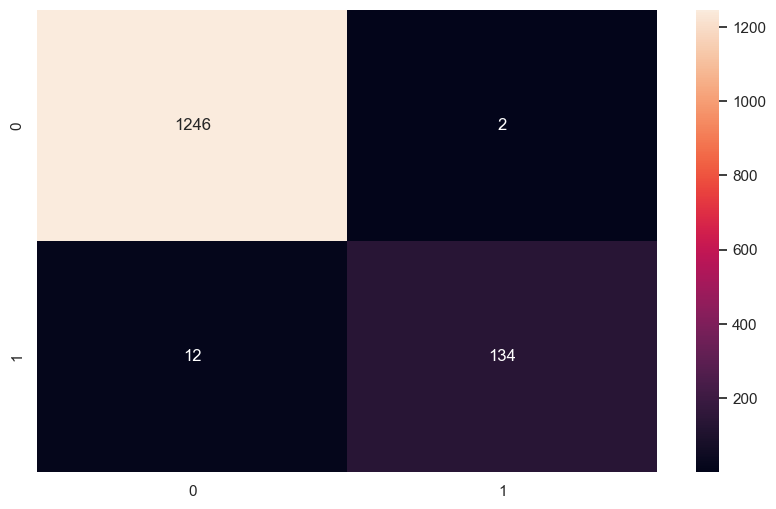

In [43]:
voting_clf = VotingClassifier(estimators=[('SVC', clf_svm),
                                          ('LogReg', clf_lr),
                                          ('RF', clf_rf),
                                          ('AdaBoost',clf_adb),
                                          ('KNN',clf_knn),
                                          ('NB',clf_nb),
                                          ('DT',clf_dt)
                                         ],
                              voting='hard'
                             )
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

In [44]:
import pickle
filename = 'CV_BestModel.sav'
pickle.dump(voting_clf, open(filename, 'wb'))

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">RESULT EVALUATION</p>

In [45]:
text = "I am / exhauted :) and restless."

In [46]:
clean_text = text_cleaner(text)

C:\Users\shish\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [47]:
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

C:\Users\shish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [48]:
output = {0:"No Anxiety/Depression",
          1:"Anxiety/Depression"}
print(output[single_prediction])

Anxiety/Depression


<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">TEXT VISUALIZATION</p>

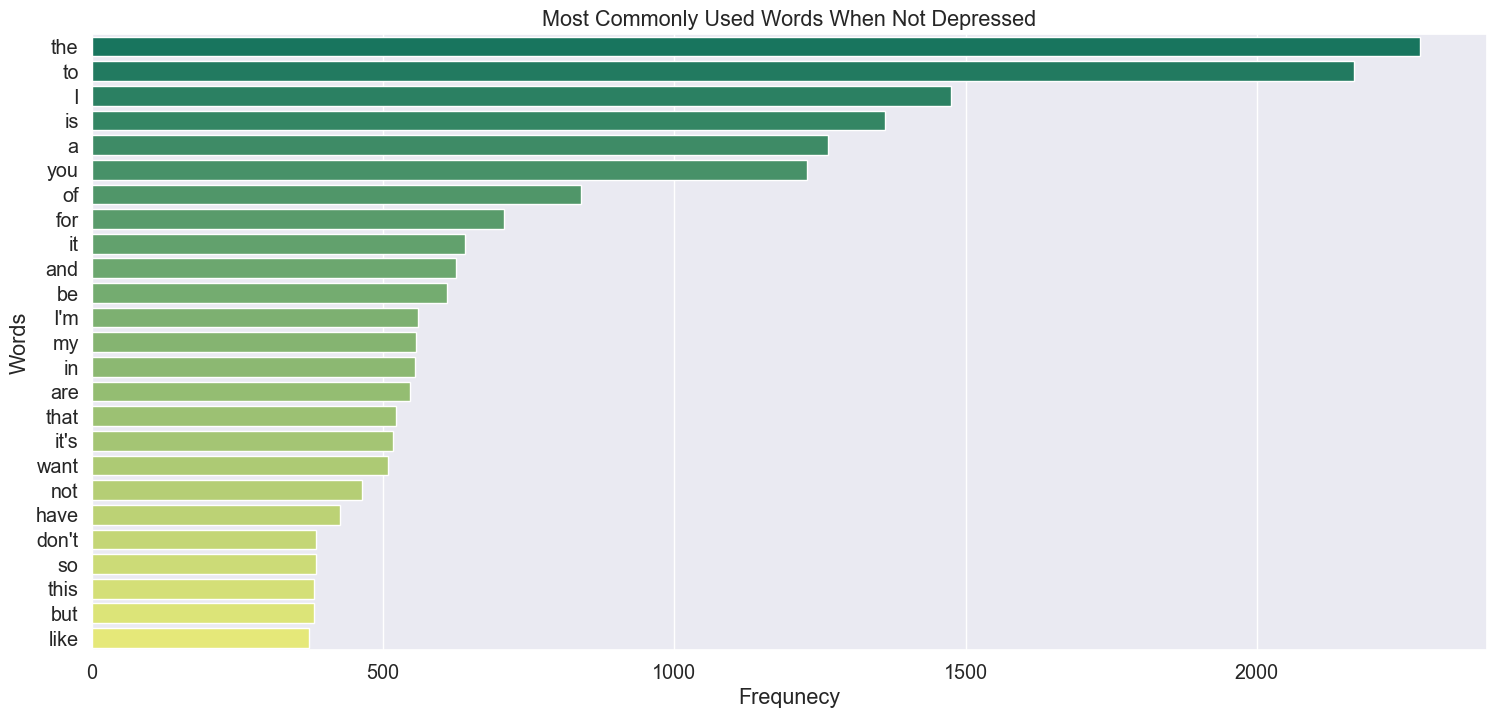

In [54]:
all_nodep_words = []
for sentence in df[df['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Not Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()